In [1]:
#importing the libraries to get the plots 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import plotly.express as px


In [2]:
#style parameters to design our plots accordingly 
sns.set_style('whitegrid') #we have set the grid background to be plain white 
plt.rcParams['font.size']=18 #font to be used in the grid  
plt.rcParams['figure.figsize']=(15,8) #length and height of the grid 
plt.rcParams['figure.facecolor']='#ffffff'#color below the grid; this code is of burlywood1 color 

In [5]:
#reading and loading the dataset in the jupyter notebook 
data_set= pd.read_csv("C:/Users/samra/Downloads/world-happiness-report-2021-1.csv")
data_set.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                             1.446                         1.106   
1                             1.502                         1.108   
2                             1.566                         1.079   
3                             1.482                         1.172   
4                             1.501                         1.079   

   Explained by: Healthy life expectancy  \
0                                  0.741   
1                                  0.763   
2                                  0.816   
3                                  0.772   
4                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  
2                                    0.413                2.839  
3                                    0.170                2.967  
4                                    0.384                2.798

In [6]:
data_set_columns = ['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
data_set = data_set[data_set_columns].copy()
df_happy1 = data_set.rename({'Country name':'country_name','Regional indicator':'regional_indicator','Ladder score':'happiness_score','Logged GDP per capita':'logged_percapita','Social support':'social_support','Healthy life expectancy':'health_life','Freedom to make life choices':'freedom_lifechoices','Generosity':'generosity','Perceptions of corruption':'perception_corruption'}, axis=1)
df_happy1.head()

country_name regional_indicator  happiness_score  logged_percapita  \
0      Finland     Western Europe            7.842            10.775   
1      Denmark     Western Europe            7.620            10.933   
2  Switzerland     Western Europe            7.571            11.117   
3      Iceland     Western Europe            7.554            10.878   
4  Netherlands     Western Europe            7.464            10.932   

   social_support  health_life  freedom_lifechoices  generosity  \
0           0.954         72.0                0.949      -0.098   
1           0.954         72.7                0.946       0.030   
2           0.942         74.4                0.919       0.025   
3           0.983         73.0                0.955       0.160   
4           0.942         72.4                0.913       0.175   

   perception_corruption  
0                  0.186  
1                  0.179  
2                  0.292  
3                  0.673  
4                  0.338

In [7]:
#Viewing the changes to the dataset made 
df_happy1.head()
df_happy1.shape
df_happy1.info()
df_happy1.describe()
#type(data_set)
df_happy1.isnull().sum() #checking whether any column has null or blank; if Boolean False appears in table which infers no null values in any column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_name           149 non-null    object 
 1   regional_indicator     149 non-null    object 
 2   happiness_score        149 non-null    float64
 3   logged_percapita       149 non-null    float64
 4   social_support         149 non-null    float64
 5   health_life            149 non-null    float64
 6   freedom_lifechoices    149 non-null    float64
 7   generosity             149 non-null    float64
 8   perception_corruption  149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


country_name             0
regional_indicator       0
happiness_score          0
logged_percapita         0
social_support           0
health_life              0
freedom_lifechoices      0
generosity               0
perception_corruption    0
dtype: int64

Text(0, 0.5, '')

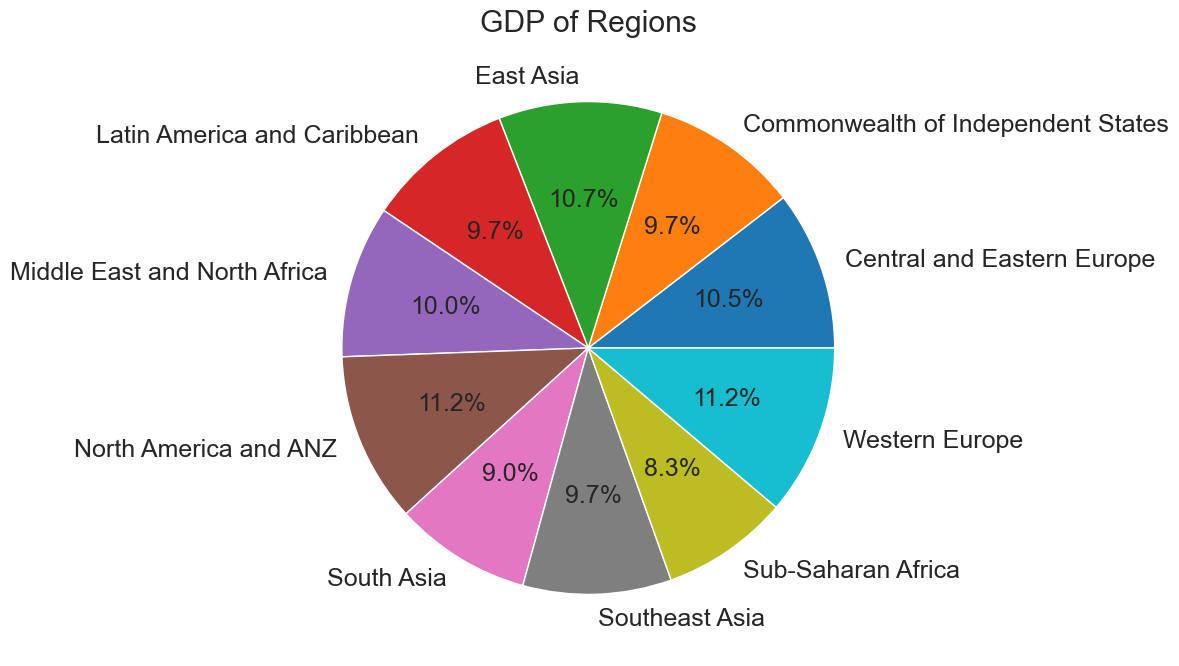

In [79]:
#Plot between regions and GDP by percentage ; contribution to World Economy 
GDP_column= df_happy1.groupby('regional_indicator')['logged_percapita'].mean()
GDP_column 
GDP_column.plot.pie(autopct= '%1.1f%%')
plt.title("GDP of Regions")
plt.ylabel('')

In [8]:
#total countries
total_countries = df_happy1.groupby("regional_indicator")[("country_name")].count()
print(total_countries)

regional_indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: country_name, dtype: int64


In [10]:
# Creating a new DataFrame with the mean happiness score  and GDP per capita by region
df_grouped = df_happy1.groupby("regional_indicator")[[ "social_support"]].mean().reset_index()

# Creating the donut chart
fig = go.Figure(data=go.Pie(
    labels=df_grouped["regional_indicator"],
    values=df_grouped["social_support"],
    hole=0.4,
    textinfo="label+percent",
    textposition="inside",
    marker=dict(colors=px.colors.qualitative.Pastel)
))

# layout modulation
fig.update_layout(
    title="Social support in Various Regions",
    annotations=[dict(text=" ", x=0.5, y=0.5, font_size=25, showarrow=False)]
)

fig.show()

C:\Users\samra\AppData\Local\Temp\ipykernel_17832\2409401193.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask= np.zeros_like(cor , dtype= np.bool),


<AxesSubplot:>

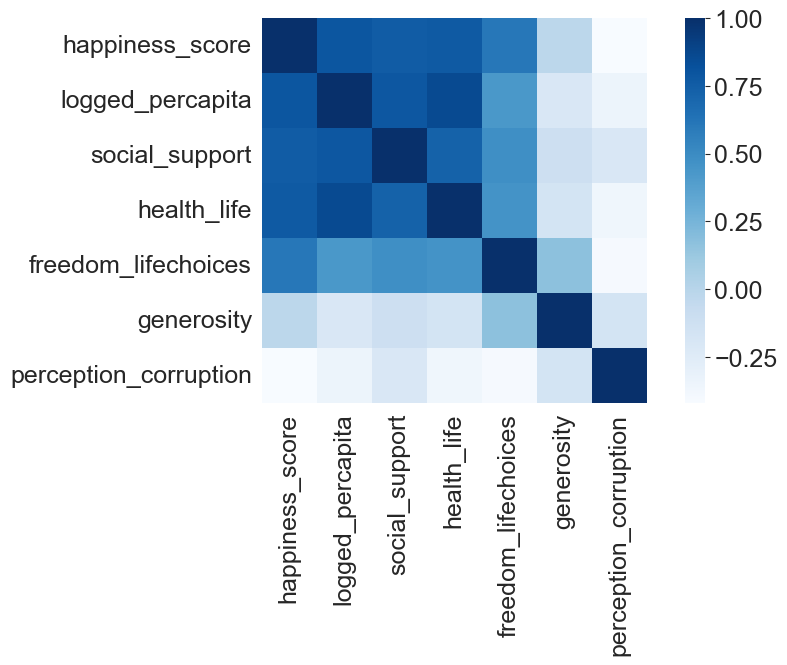

In [9]:
#Total countries
total_country=df_happy1.groupby('regional_indicator')[['country_name']].count()
#print(total_country)
cor= df_happy1.corr(method='pearson')
f, ax = plt.subplots(figsize =(10,5))
sns.heatmap(cor, mask= np.zeros_like(cor , dtype= np.bool),
            cmap= 'Blues', square= True ,ax=ax)

<BarContainer object of 10 artists>

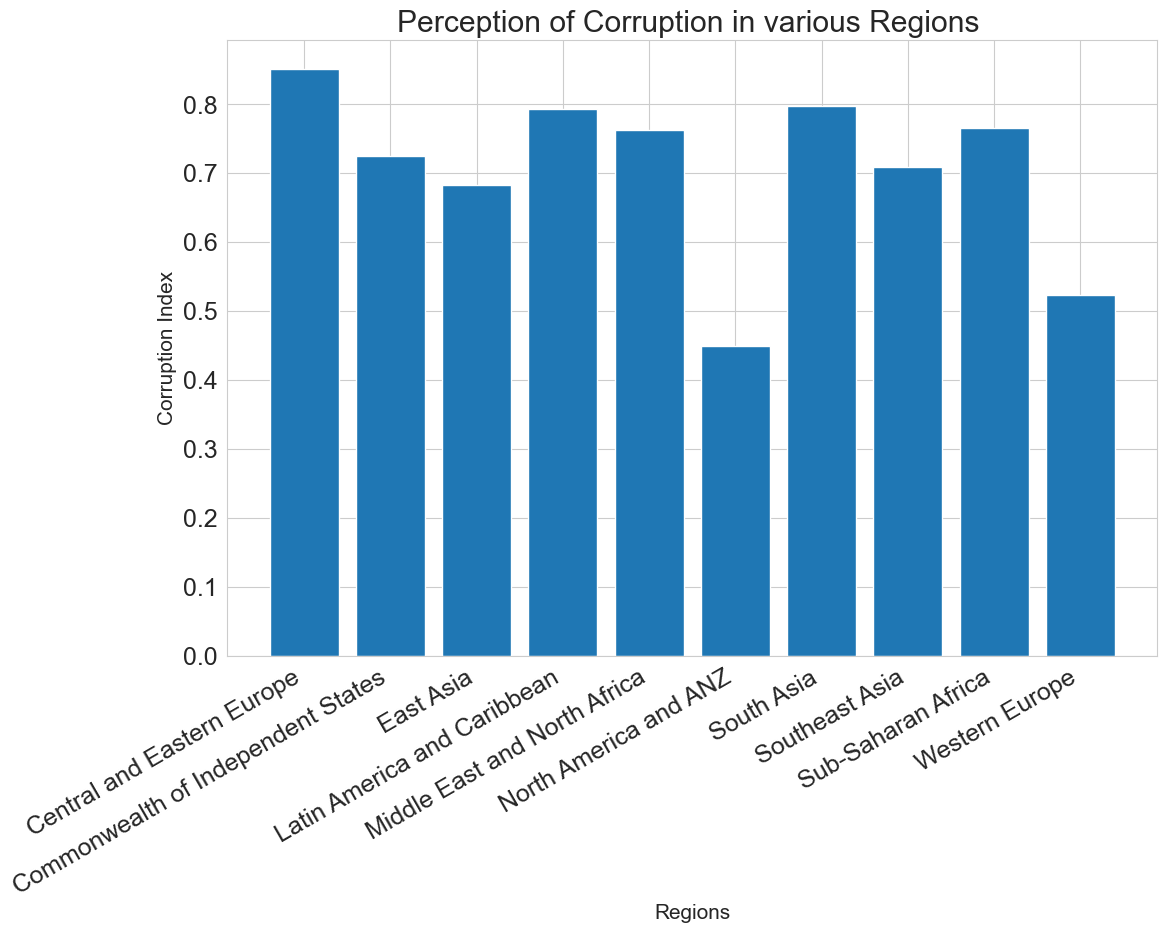

In [83]:
#corruption in regions
corruption= df_happy1.groupby('regional_indicator')[['perception_corruption']].mean()
#corruption
plt.rcParams['figure.figsize']=(12,8)
plt.title('Perception of Corruption in various Regions ')
plt.xlabel('Regions', fontsize= 15)
plt.ylabel('Corruption Index', fontsize=15)
plt.xticks(rotation =30,ha='right')
plt.bar(corruption.index, corruption.perception_corruption)

C:\Users\vinee\AppData\Local\Temp\ipykernel_17672\726344340.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\vinee\AppData\Local\Temp\ipykernel_17672\726344340.py:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



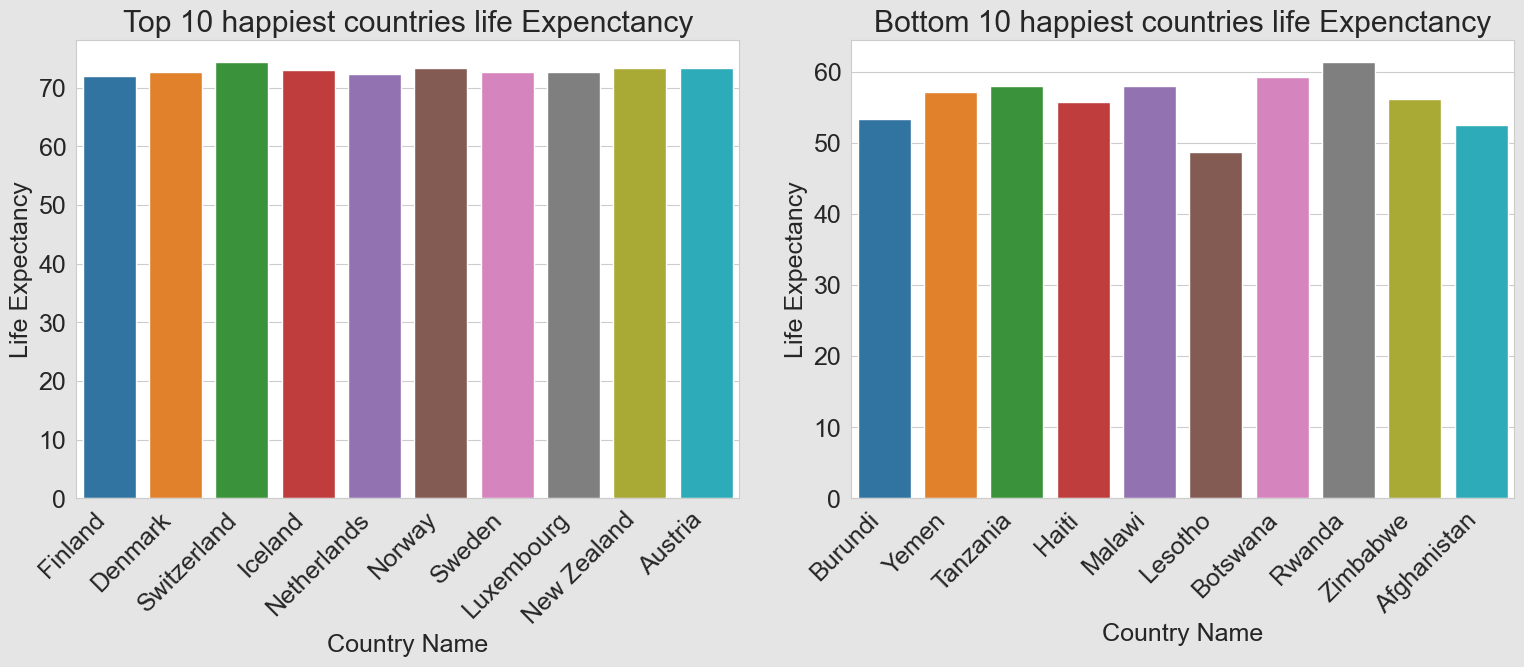

In [84]:
top_10=df_happy1.head(10)
bottom_10=df_happy1.tail(10)

fig,axes = plt.subplots(1,2, figsize =(16,6))
plt.tight_layout(pad= 2)
xlabels= top_10.country_name
axes[0].set_title('Top 10 happiest countries life Expenctancy')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=top_10.country_name,y= top_10.health_life, ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

xlabels= bottom_10.country_name
axes[1].set_title('Bottom 10 happiest countries life Expenctancy')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=bottom_10.country_name,y= bottom_10.health_life, ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')
fig.set_facecolor('#e5e5e5')

Text(0, 0.5, 'Happiness Score')

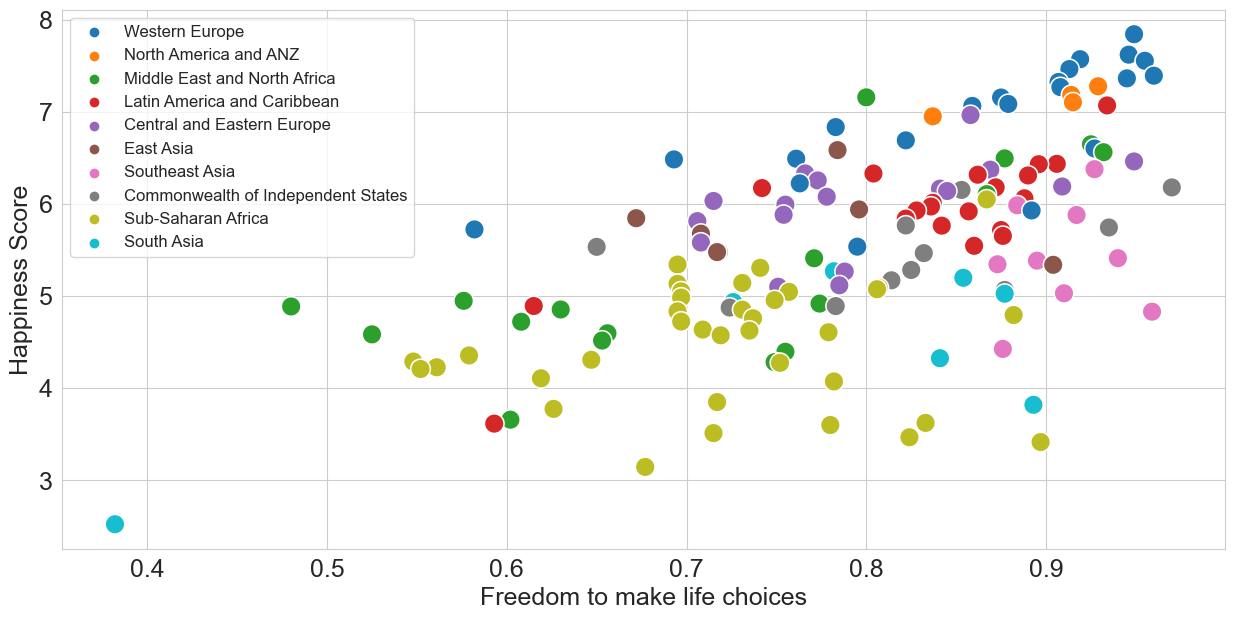

In [85]:
#Corelation between Freedom to make life choices and Happiness
plt.rcParams['figure.figsize']= (15,7)
sns.scatterplot(x=df_happy1.freedom_lifechoices,y=df_happy1.happiness_score, hue=df_happy1.regional_indicator, s=200)
plt.legend(loc='upper left', fontsize='12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')

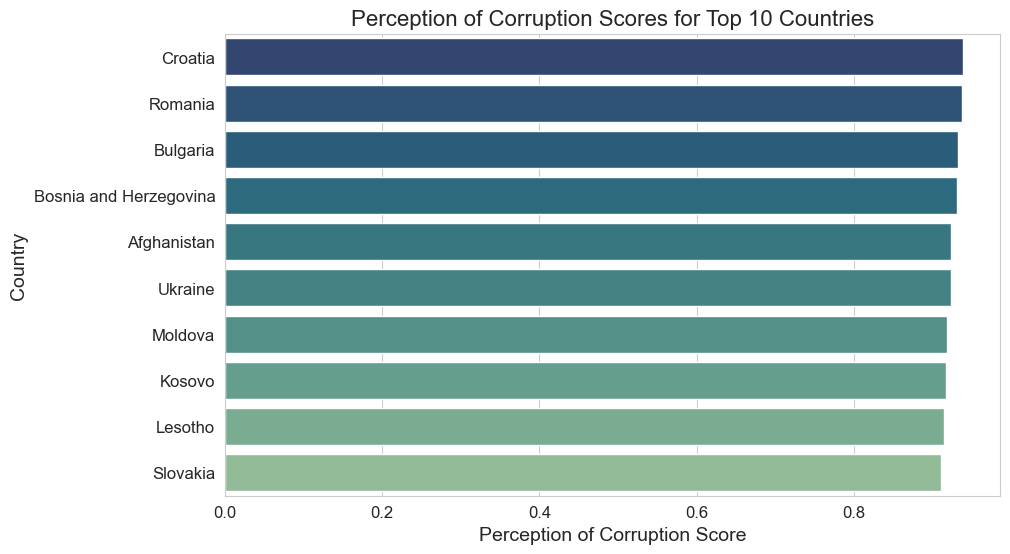

In [86]:
# Filter the data for the countries with the top 10 highest perception of corruption scores
top_10 = df_happy1.sort_values("perception_corruption", ascending=False).head(10)

# Set the style of the plot
sns.set_style("whitegrid")

# Create a figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal bar chart using Seaborn
sns.barplot(data=top_10, y="country_name", x="perception_corruption", palette="crest_r", ax=ax)

# Set the title and axis labels
ax.set_title("Perception of Corruption Scores for Top 10 Countries", fontsize=16)
ax.set_xlabel("Perception of Corruption Score", fontsize=14)
ax.set_ylabel("Country", fontsize=14)

# Set the ticks and tick labels
ax.tick_params(axis='both', labelsize=12)

# Display the plot
plt.show()

Text(0, 0.5, 'Happiness Score')

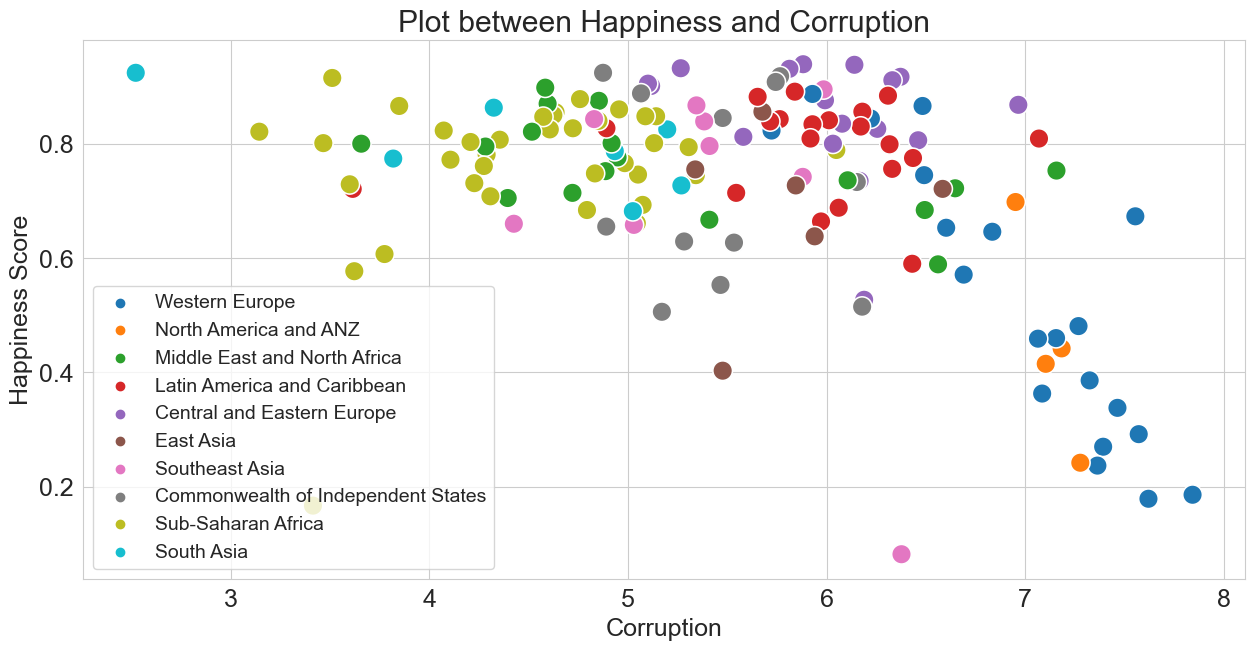

In [87]:
#corruption vs happiness
plt.rcParams['figure.figsize']= (15,7)
plt.title('Plot between Happiness and Corruption')
sns.scatterplot(x=df_happy1.happiness_score,y = df_happy1.perception_corruption ,hue= df_happy1.regional_indicator, s= 200);

plt.legend(loc= 'lower left', fontsize ='14')
plt.xlabel('Corruption')
plt.ylabel('Happiness Score')

[7.54843 7.54841 7.46962 7.24789 7.37029 7.44718 7.35667 7.24717 7.21195
 7.24007 7.18729 6.90532 7.12351 7.12015 7.20779 6.62764 7.06231 6.70197
 6.65279 6.74822 6.75671 6.59189 6.73555 6.56546 6.5568  6.47714 6.67043
 6.45434 6.54797 5.73106 6.03046 7.41257 6.0085  6.21138 6.02401 6.07912
 5.91226 6.19722 6.07696 6.25709 6.15048 6.06529 6.06743 6.17728 6.04352
 5.77194 6.17275 5.96374 5.72695 6.01752 5.99273 5.93326 6.09864 5.91185
 5.94862 6.57749 5.98287 6.12005 5.81314 5.93544 5.60641 5.86607 5.77148
 5.76424 5.62105 5.78597 5.7999  5.72271 5.57494 5.36585 5.67745 5.72857
 5.70062 6.32972 5.57271 5.62676 6.81247 5.57465 6.02553 5.34071 5.70055
 5.31156 4.7375  5.44925 5.08323 5.2685  5.14827 5.52474 5.47458 5.29495
 5.03803 5.01663 5.20249 5.1513  4.96629 4.78376 5.35434 4.90643 4.62455
 4.92886 5.09874 4.56014 5.09542 5.22027 4.87445 4.7724  5.09435 4.92925
 4.98303 5.59848 4.38705 4.73913 4.77997 4.87083 4.74733 4.80478 4.66827
 4.86197 4.62614 4.6309  4.76562 4.64736 5.01578 4.

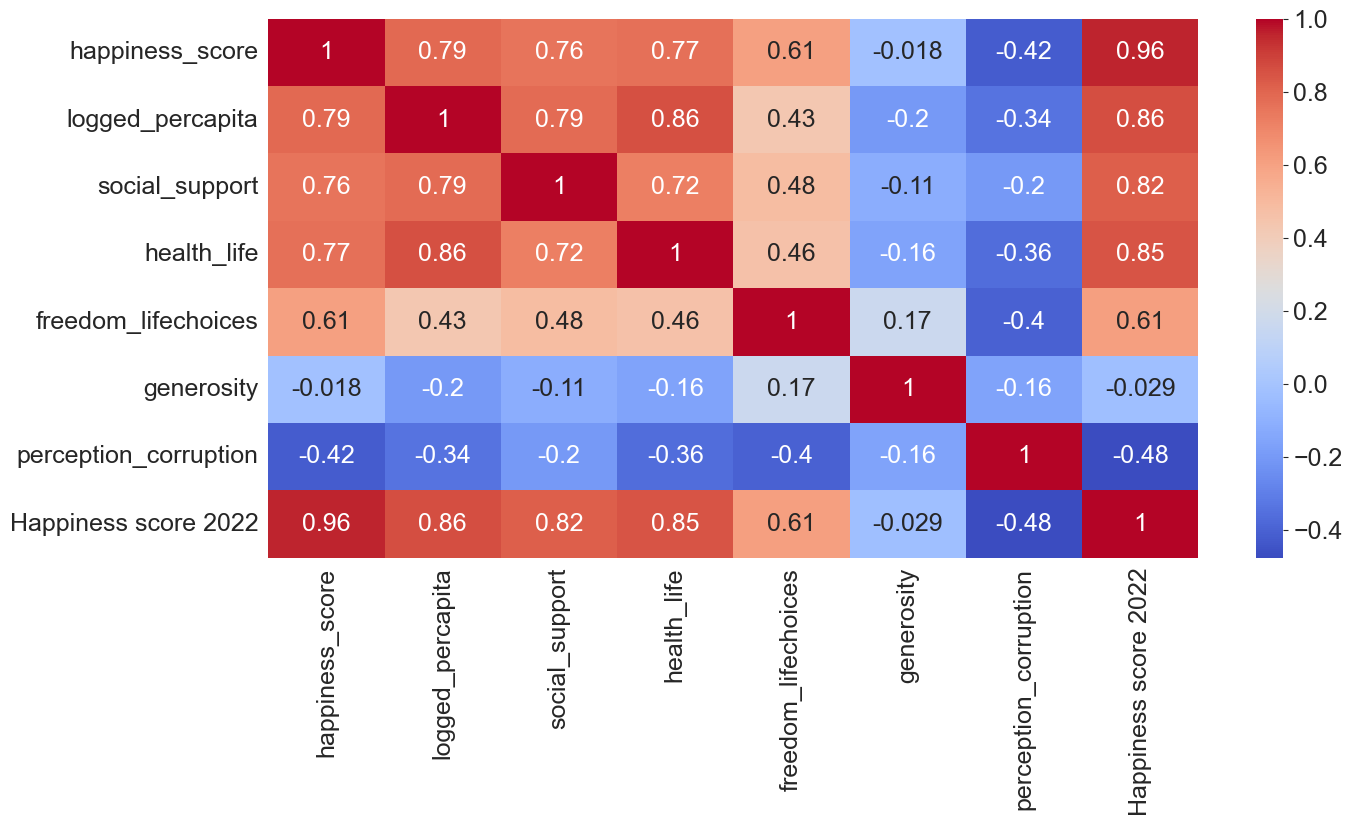

In [88]:
# selecting the features and target variable
features = ['logged_percapita', 'social_support', 'health_life', 'freedom_lifechoices', 'generosity', 'perception_corruption']
target = 'happiness_score'

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_happy1[features], df_happy1[target], test_size=0.2, random_state=42)

# training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predicting the happiness score for 2022 of each country
X_2022 = df_happy1[features]
y_2022_pred = model.predict(X_2022)

# adding the predicted happiness score for 2022 to the dataset
df_happy1['Happiness score 2022'] = y_2022_pred

# print the predicted happiness scores for 2022
print(y_2022_pred)

import seaborn as sns
import matplotlib.pyplot as plt

# create a correlation matrix
corr = df_happy1.corr()

# plot the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)

# display the plot
plt.show()



Accuracy: 0.8222222222222222


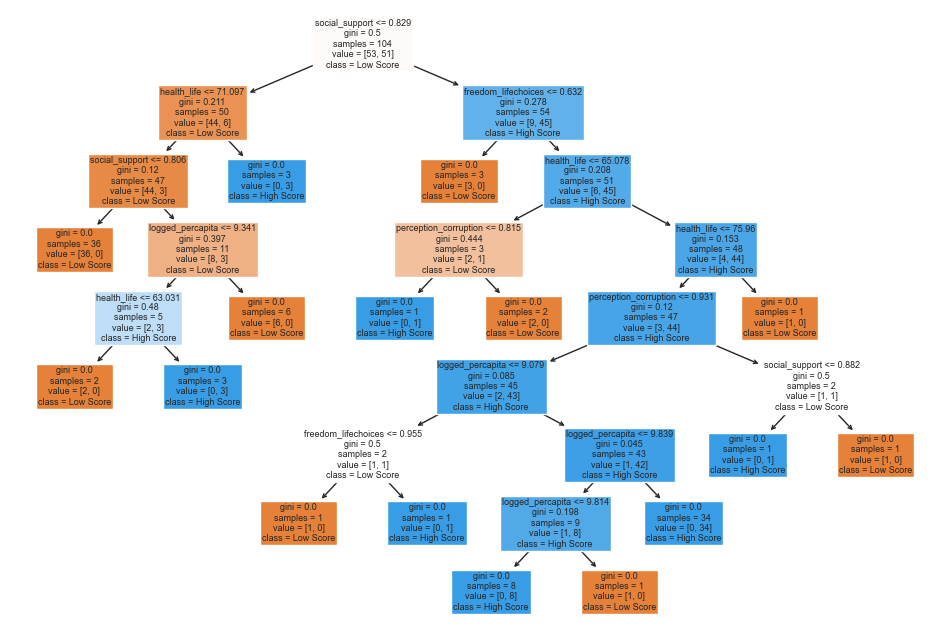

In [89]:
# Decision Tree
# Select features and target variable
X = df_happy1[['logged_percapita', 'social_support', 'health_life', 'freedom_lifechoices', 'generosity', 'perception_corruption']]
y = df_happy1['happiness_score'] > 5.5 # True if ladder score is greater than 5.5, False otherwise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Visualize the Decision Tree
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(clf, filled=True, ax=ax, feature_names=X.columns, class_names=['Low Score', 'High Score'])
plt.show()

In [90]:
# Random Forest
# Select features and target variable
X = df_happy1[['logged_percapita', 'social_support', 'health_life', 'freedom_lifechoices', 'generosity', 'perception_corruption']]
y = df_happy1['happiness_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a Random Forest Regressor object
clf = RandomForestRegressor()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = clf.predict(X_test)

# Model Accuracy, how well does the regressor predict the target variable?
print("R2 score:", metrics.r2_score(y_test, y_pred))

R2 score: 0.7551407415027804


In [91]:
# Importing required libraries

# Select features and target variable
X = df_happy1[['logged_percapita', 'social_support', 'health_life', 'freedom_lifechoices', 'generosity', 'perception_corruption']]
y = df_happy1['happiness_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a KNN Regressor object
clf = KNeighborsRegressor(n_neighbors=5)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = clf.predict(X_test)

# Model Accuracy, how well does the regressor predict the target variable?
print("R2 score:", metrics.r2_score(y_test, y_pred))

R2 score: 0.6550073969870142
